# Machine Learning - Supervised model - Classification

## Content of the dataset

In [1]:
#This dataset contains the first 10min. stats of around 9,000 ranked games from League of Legends, an online computer videogame. The data belongs to 
#a high division of the League. 
#There are 38 features (in-game parameters) in total collected after 10 minutes of game. 
# The column blueWins is the target value (the value we are trying to predict). A value of 1 means Victory and 0 Defeat.


# Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


# Import of the dataset

In [15]:
lol= pd.read_csv('high_diamond_ranked_10min.csv')
lol

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


# Data exploration

We have almost 10,000 rows and 40 columns

In [4]:
lol.shape

(9879, 40)

Overall information of the dataset

In [5]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

### Checking for the data type

The dataset only contains integers and float

In [6]:
lol.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


### Describe function

In [7]:
lol.describe

<bound method NDFrame.describe of           gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1  

### Checking for unique values

The unique values for the target are categorical: 1 represents Victory and 0 Defeat.

In [8]:
lol['blueWins'].unique()

array([0, 1])

### Checking for null values

There are no null values in the dataset

In [9]:
lol.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

### Checking for balance of the data

The data related to our target is very balanced. Therefore, we do not need to oversample or undersample our data.


<IPython.core.display.Javascript object>

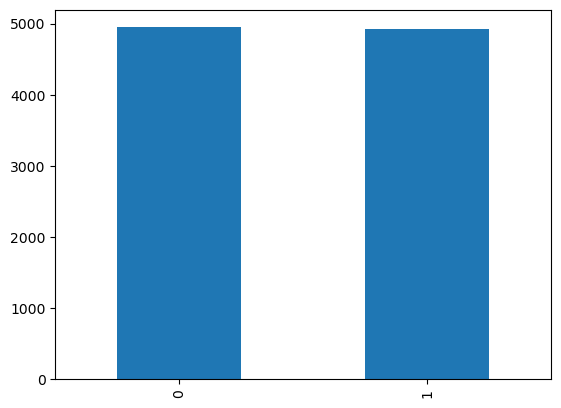

In [10]:
lol= lol['blueWins'].value_counts()
lol.plot(kind='bar')
plt.show()


### Checking for duplicates

We have no duplicates in our dataset.

In [11]:
lol.duplicated().sum()

0

### Display boxplot to display the distribution of a column

We use this graphical representation of the target to check the distribution of the data

<Axes: xlabel='blueWins'>

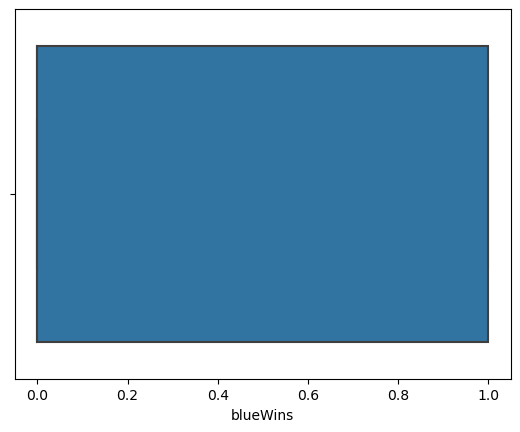

In [16]:
target_distribution=sns.boxplot(x=lol['blueWins'])
target_distribution

### Values Range

This detect the values range for each column of the dataset


In [17]:
lol.describe([x*0.1 for x in range(10)])

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
0%,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
10%,4.459234e+09,0.000000,13.000000,1.000000,0.000000,3.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,14670.000000,6.600000,16469.800000,189.000000,40.000000,-3072.000000,-2386.200000,18.900000,1467.000000
20%,4.475645e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,...,0.000000,15217.600000,6.600000,17011.600000,200.000000,44.000000,-2012.400000,-1541.000000,20.000000,1521.760000
30%,4.491607e+09,0.000000,15.000000,2.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15629.400000,6.800000,17384.400000,207.000000,46.000000,-1235.600000,-943.600000,20.700000,1562.940000
40%,4.501524e+09,0.000000,16.000000,2.000000,0.000000,5.000000,5.000000,5.000000,0.000000,0.000000,...,0.000000,16021.200000,6.800000,17704.000000,213.000000,48.000000,-616.000000,-427.000000,21.300000,1602.120000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000


### Histogram 

We use this histogram to display the distribution of a our features

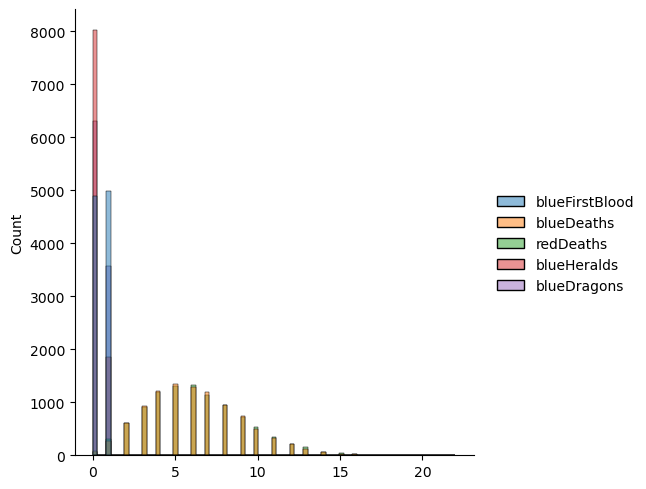

In [18]:
features_distribution=sns.displot(data=lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']])
features_distribution

# Variance

In [19]:
lol.var()

gameId                          7.602857e+14
blueWins                        2.500244e-01
blueWardsPlaced                 3.246907e+02
blueWardsDestroyed              4.730618e+00
blueFirstBlood                  2.500022e-01
blueKills                       9.066289e+00
blueDeaths                      8.607286e+00
blueAssists                     1.652032e+01
blueEliteMonsters               3.912834e-01
blueDragons                     2.309738e-01
blueHeralds                     1.526555e-01
blueTowersDestroyed             5.971629e-02
blueTotalGold                   2.357596e+06
blueAvgLevel                    9.311397e-02
blueTotalExperience             1.441257e+06
blueTotalMinionsKilled          4.777913e+02
blueTotalJungleMinionsKilled    9.797599e+01
blueGoldDiff                    6.018922e+06
blueExperienceDiff              3.687823e+06
blueCSPerMin                    4.777913e+00
blueGoldPerMin                  2.357596e+04
redWardsPlaced                  3.406766e+02
redWardsDe

# Correlation

In [20]:
lol.corr()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


# Hotmap

Here we are going to check the correlation between the features and the target.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

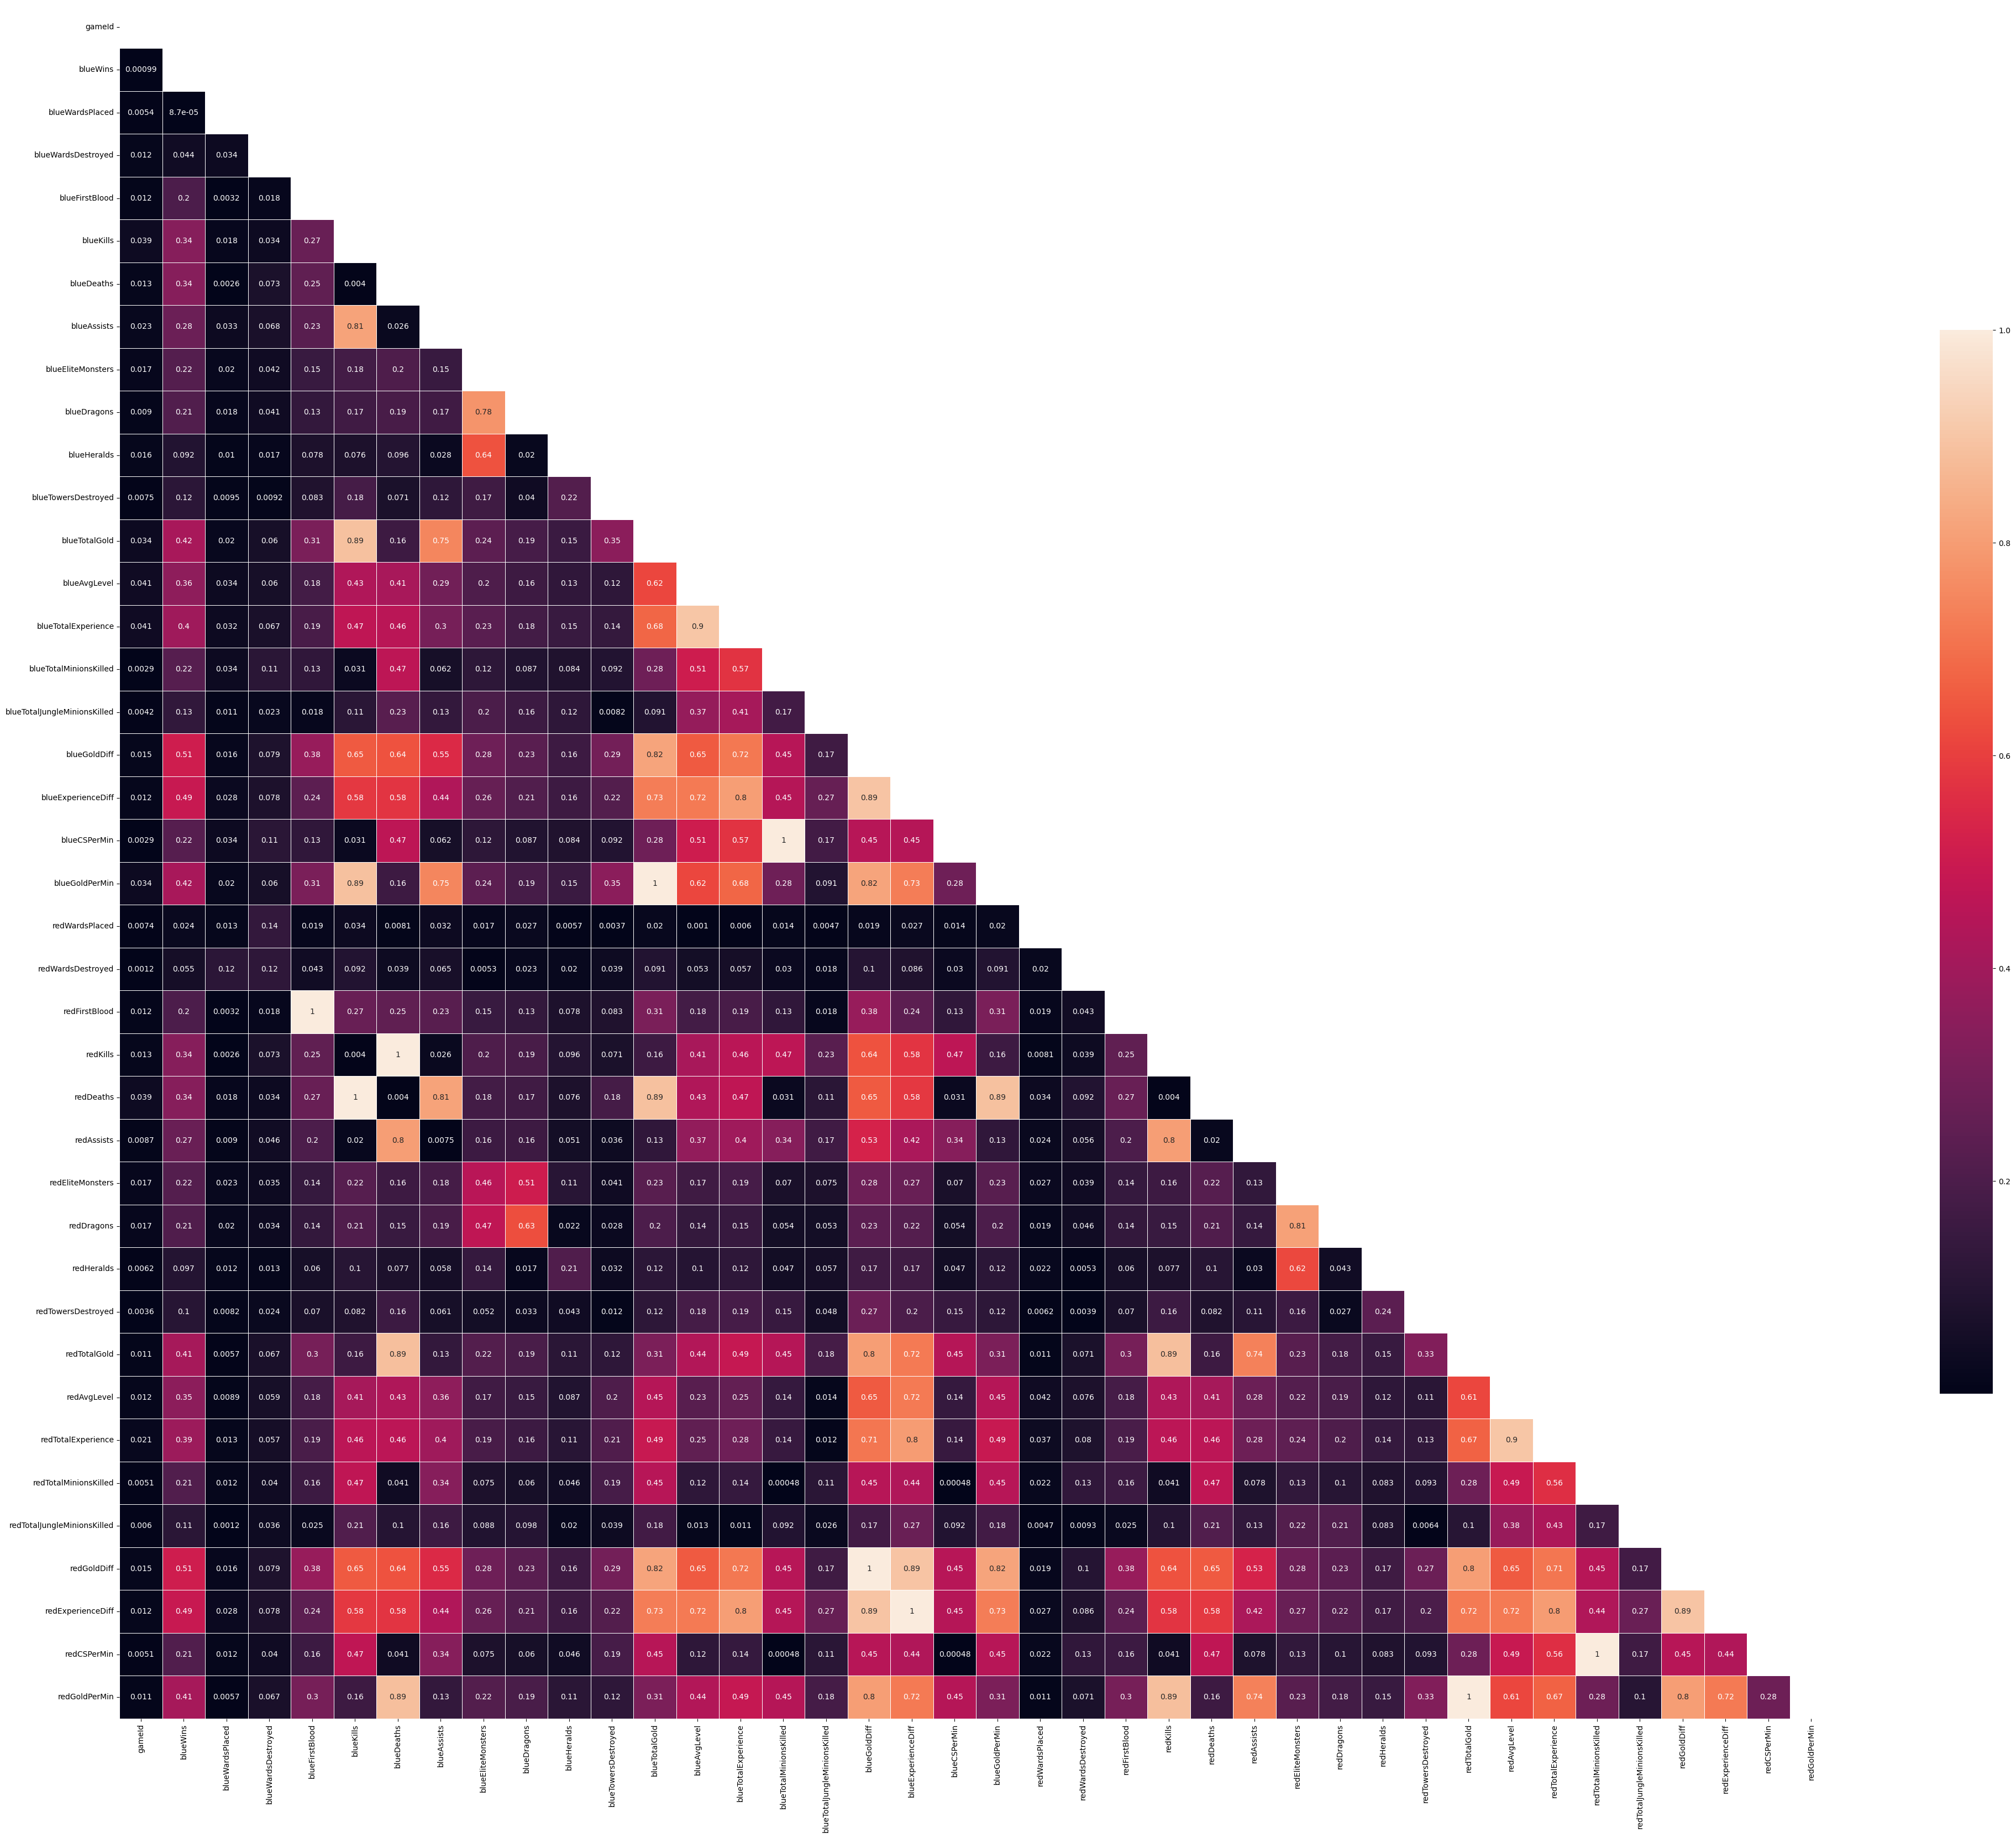

In [21]:

corr=np.abs(lol.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(520, 30, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()



# Data cleaning


In this scenario, we did not need to clean the data for our dataset since there were no duplicates, unnecessary columns or null or wrong values.


# Random Forest Model

In [22]:

features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']

In [23]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

<IPython.core.display.Javascript object>

In [24]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                               max_depth = 5,
                               random_state=1)


forest.fit(X_train, y_train)

print("r^2: ",forest.score(X_test, y_test))

pred = forest.predict(X_test)


r^2:  0.7069838056680162


We got a 0.70% accuracy in our model. Taking into account that the dataset is very balanced, we can hardly do better. We will use this model for our project. Nevertheless, we will try some other models to check that there are no better alternatives.

# Pickle the model

We pickle the model so that we can import the model somewhere else. In this case, we will import it in Streamlit.

In [25]:
import pickle

# #This is to dump the model out of python
model = forest

# Save the model to a file using pickle
with open('Model.pkl', 'wb') as file:
    pickle.dump(model,file)
    


# From here on, we will try a variety of model trying to find better results thant the Random Forest provided.

# Model - using robust scaler

In [ ]:

features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size = 0.20, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


forest = RandomForestClassifier(n_estimators=100,
                                max_depth = 5,
                                random_state=1)


forest.fit(X_train, y_train)

print("r^2: ",forest.score(X_test, y_test))

pred = forest.predict(X_test)


# Grid Search

In [ ]:
#Grid Search tries all possible combinations of hyperparameters
from sklearn.model_selection import GridSearchCV
features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#now we need to set a full list of candidates to consider

grid = {"n_estimators": [10, 100, 500, 1000],  #4*3*2. =120
        "max_depth": [5, 10, None],
        "max_leaf_nodes": [10,50]}

In [ ]:
#estimator -> model to optimize

forest_grid = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = forest_grid, param_grid= grid, cv=3)

In [ ]:
#Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
#and the winner is ...
grid_search.best_params_

In [ ]:
#evaluate it
grid_search.score(X_test, y_test)

# Random Search

In [ ]:
# Number of trees in random forest

features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split <- a non-numeric parameter, no problem. Could also have been used in gridsearch
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None) #<- plus no cap
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#forest = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, cv=5, n_iter=20)

random_search.fit(X_train, y_train)


In [ ]:
random_search.score(X_test, y_test)

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=100, random_state=1)
ada_reg.fit(X_train, y_train)

print("r^2: ",ada_reg.score(X_test, y_test))

pred = ada_reg.predict(X_test)


# Gradient Boost

In [ ]:
#gradient boosting wil try to predict the error of the previous estimator
from sklearn.ensemble import GradientBoostingClassifier
features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#with this one we can only use decision trees model thats why we dont use DecisionTreeRegressor
gb_reg = GradientBoostingClassifier(max_depth=5,
                                   n_estimators=100,
                                   random_state=1)

gb_reg.fit(X_train, y_train)

print("r^2: ",gb_reg.score(X_test, y_test))

pred = gb_reg.predict(X_test)


# Extreme gradient boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
predictions = xgb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


# STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Assuming you have X_train, X_test, y_train, and y_test
# Define the base models
level0 = [("svm", SVC()),
          ("rf", RandomForestClassifier())]

# Define the final meta-model
level1 = LogisticRegression()

# Define the stacking ensemble model
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# Train the model as usual
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")



# Model SVM - Support vector machine

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_classifier = svm.SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Display other metrics
print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


# Cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [ ]:
features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

In [ ]:
# Applying cross-validation
model = DecisionTreeClassifier(max_depth=2)
cv_results = cross_validate(model, X_test, y_test, cv=5)


In [ ]:
# Access the results, e.g., mean test score
mean_test_score = cv_results['test_score'].mean()
print("Mean Test Score:", mean_test_score)

# Neural network model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

# Assuming 'features' is a DataFrame and 'target' is a Series
features =  lol[['blueFirstBlood', 'blueDeaths', 'redDeaths', 'blueHeralds', 'blueDragons']]
target = lol['blueWins']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model here
nn = MLPClassifier(hidden_layer_sizes=(24, 16, 8), solver="sgd", verbose=10, max_iter=200)

nn.fit(X_train, y_train)

print(f"Training score: {nn.score(X_train, y_train)}")
print(f"Test score: {nn.score(X_test, y_test)}")

new_input = X_train
prediction = nn.predict(new_input)

print(f"Prediction for new input: {prediction}")
